In [1]:
#New images in moment maps dropbox from betsy 7/20
#H40-alpha_mask.integrated.fits
#and 9 CMZ images "(galactic center images have a CMZ prefix)"

In [3]:
import numpy as np                      # I use this for maths and sometimes arrays.
                                        # "np" is just an abbreviation since we call this package so often!
import pylab                            # I use this for arrays and plotting
import matplotlib                       # Another plotting package
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec  # If there is a task you use a lot, importing it like this 
                                         # keeps you from having to constantly type "matplotlib.gridspec"
                                        # every time you call that task!
        
import scipy
import astropy.io.fits as fits          # I use this to import FITS images. 
                                        # Astropy should be included in your conda installation
from astropy.wcs import WCS             # This one helps us add coordinates to images
import pyspeckit as psk                 # I use this to do spectral line fitting
                                        #Anna: Had to install using an anaconda terminal window, its located at Users\Anna\AppData\Local\pip

from astropy.nddata import Cutout2D     #To make image cut outs
from astropy.coordinates import SkyCoord
import matplotlib.cm as cm #for colorbar??

from reproject import reproject_interp      #Anna: pip install reproject
from reproject.mosaicking import find_optimal_celestial_wcs 

import sys                 # Suppress warnings we don't care about:
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
                                            
    
# Super important: This embeds plots in the Jupyter window (instead of showing them as pop-ups)
%matplotlib inline                             

#Set plot fonts
matplotlib.rc('text', usetex=True) #Change to True later if Latex is installed
matplotlib.rc('font', family='sans-serif')


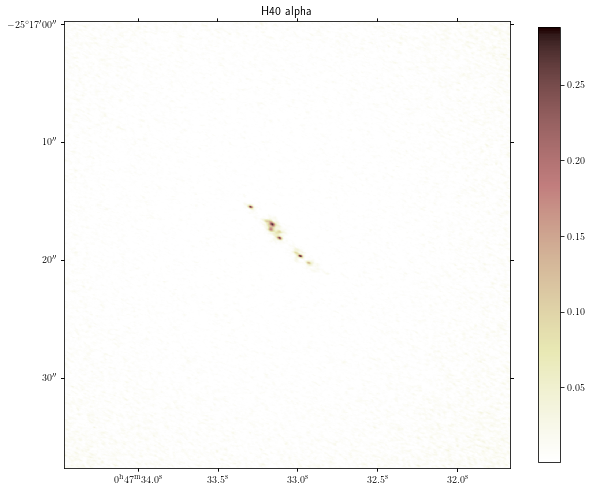

In [10]:
#Assuming this is the ionized gas in NGC 253:
path = 'H40-alpha_mask.integrated.fits'
image = fits.getdata(path)  
header = fits.getheader(path)

w1 = WCS(header) 
#print(w)
#print("The current image shape is: ", np.shape(image)) 

#Not sure if this will match, so I'm gonna reproject to HCN
HCN_path = 'HCN_mask.integrated.fits'
HCN = fits.getdata(HCN_path)  
HCN_header = fits.getheader(HCN_path)

w = WCS(HCN_header) 
#print(w)
#print("The current image shape is: ", np.shape(HCN))
H40_alpha, footprint = reproject_interp((image, header) , HCN_header) #Note: seems like didn't need reproj.

fig1 = pylab.figure(1,figsize=(10,10))
ax1 = pylab.subplot(projection=w)
ax1.set_title('H40 alpha')
im1 = pylab.imshow(H40_alpha,cmap='pink_r')
fig1.colorbar(im1, ax=ax1, shrink=0.85)

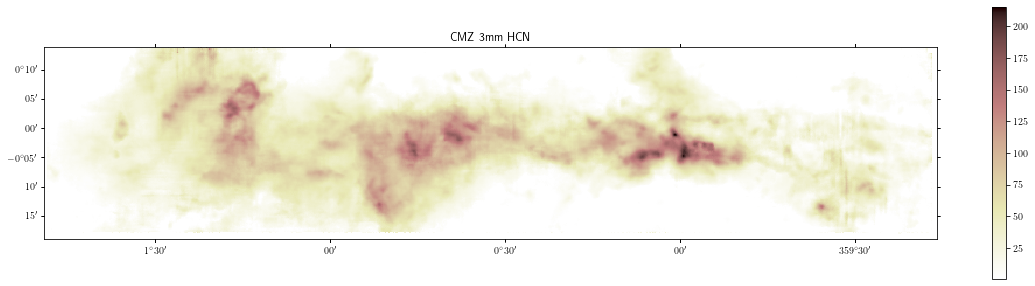

In [18]:
#Galactic Center time!
#CMZ_3mm_HCN_uniform_int.fits --> NOTE: I moved this file into the folder NGC 253 cause I didn't want to deal with
#path names right now, should fix later

CMZ_path = 'CMZ_3mm_HCN_uniform_int.fits'
CMZ_HCN = fits.getdata(CMZ_path)  
CMZ_HCN_header = fits.getheader(CMZ_path)
CMZ_HCN_w = WCS(CMZ_HCN_header) 

fig2 = pylab.figure(1,figsize=(20,10))
ax2 = pylab.subplot(projection=CMZ_HCN_w)
ax2.set_title('CMZ 3mm HCN')
im2 = pylab.imshow(CMZ_HCN,cmap='pink_r')
fig2.colorbar(im2, ax=ax2, shrink=0.5)